In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 14, 'font.family' : 'serif'})

In [2]:
mot_pic = plt.imread("2d mot.bmp")
mot_pic.shape

(2448, 2048)

## Calibrate axes

We estimate this based on knowing the diameter of the aperture in chamber 1 which is 38mm. This aperture is ~54mm away from the 2D mot which is about 150mm from the camera:

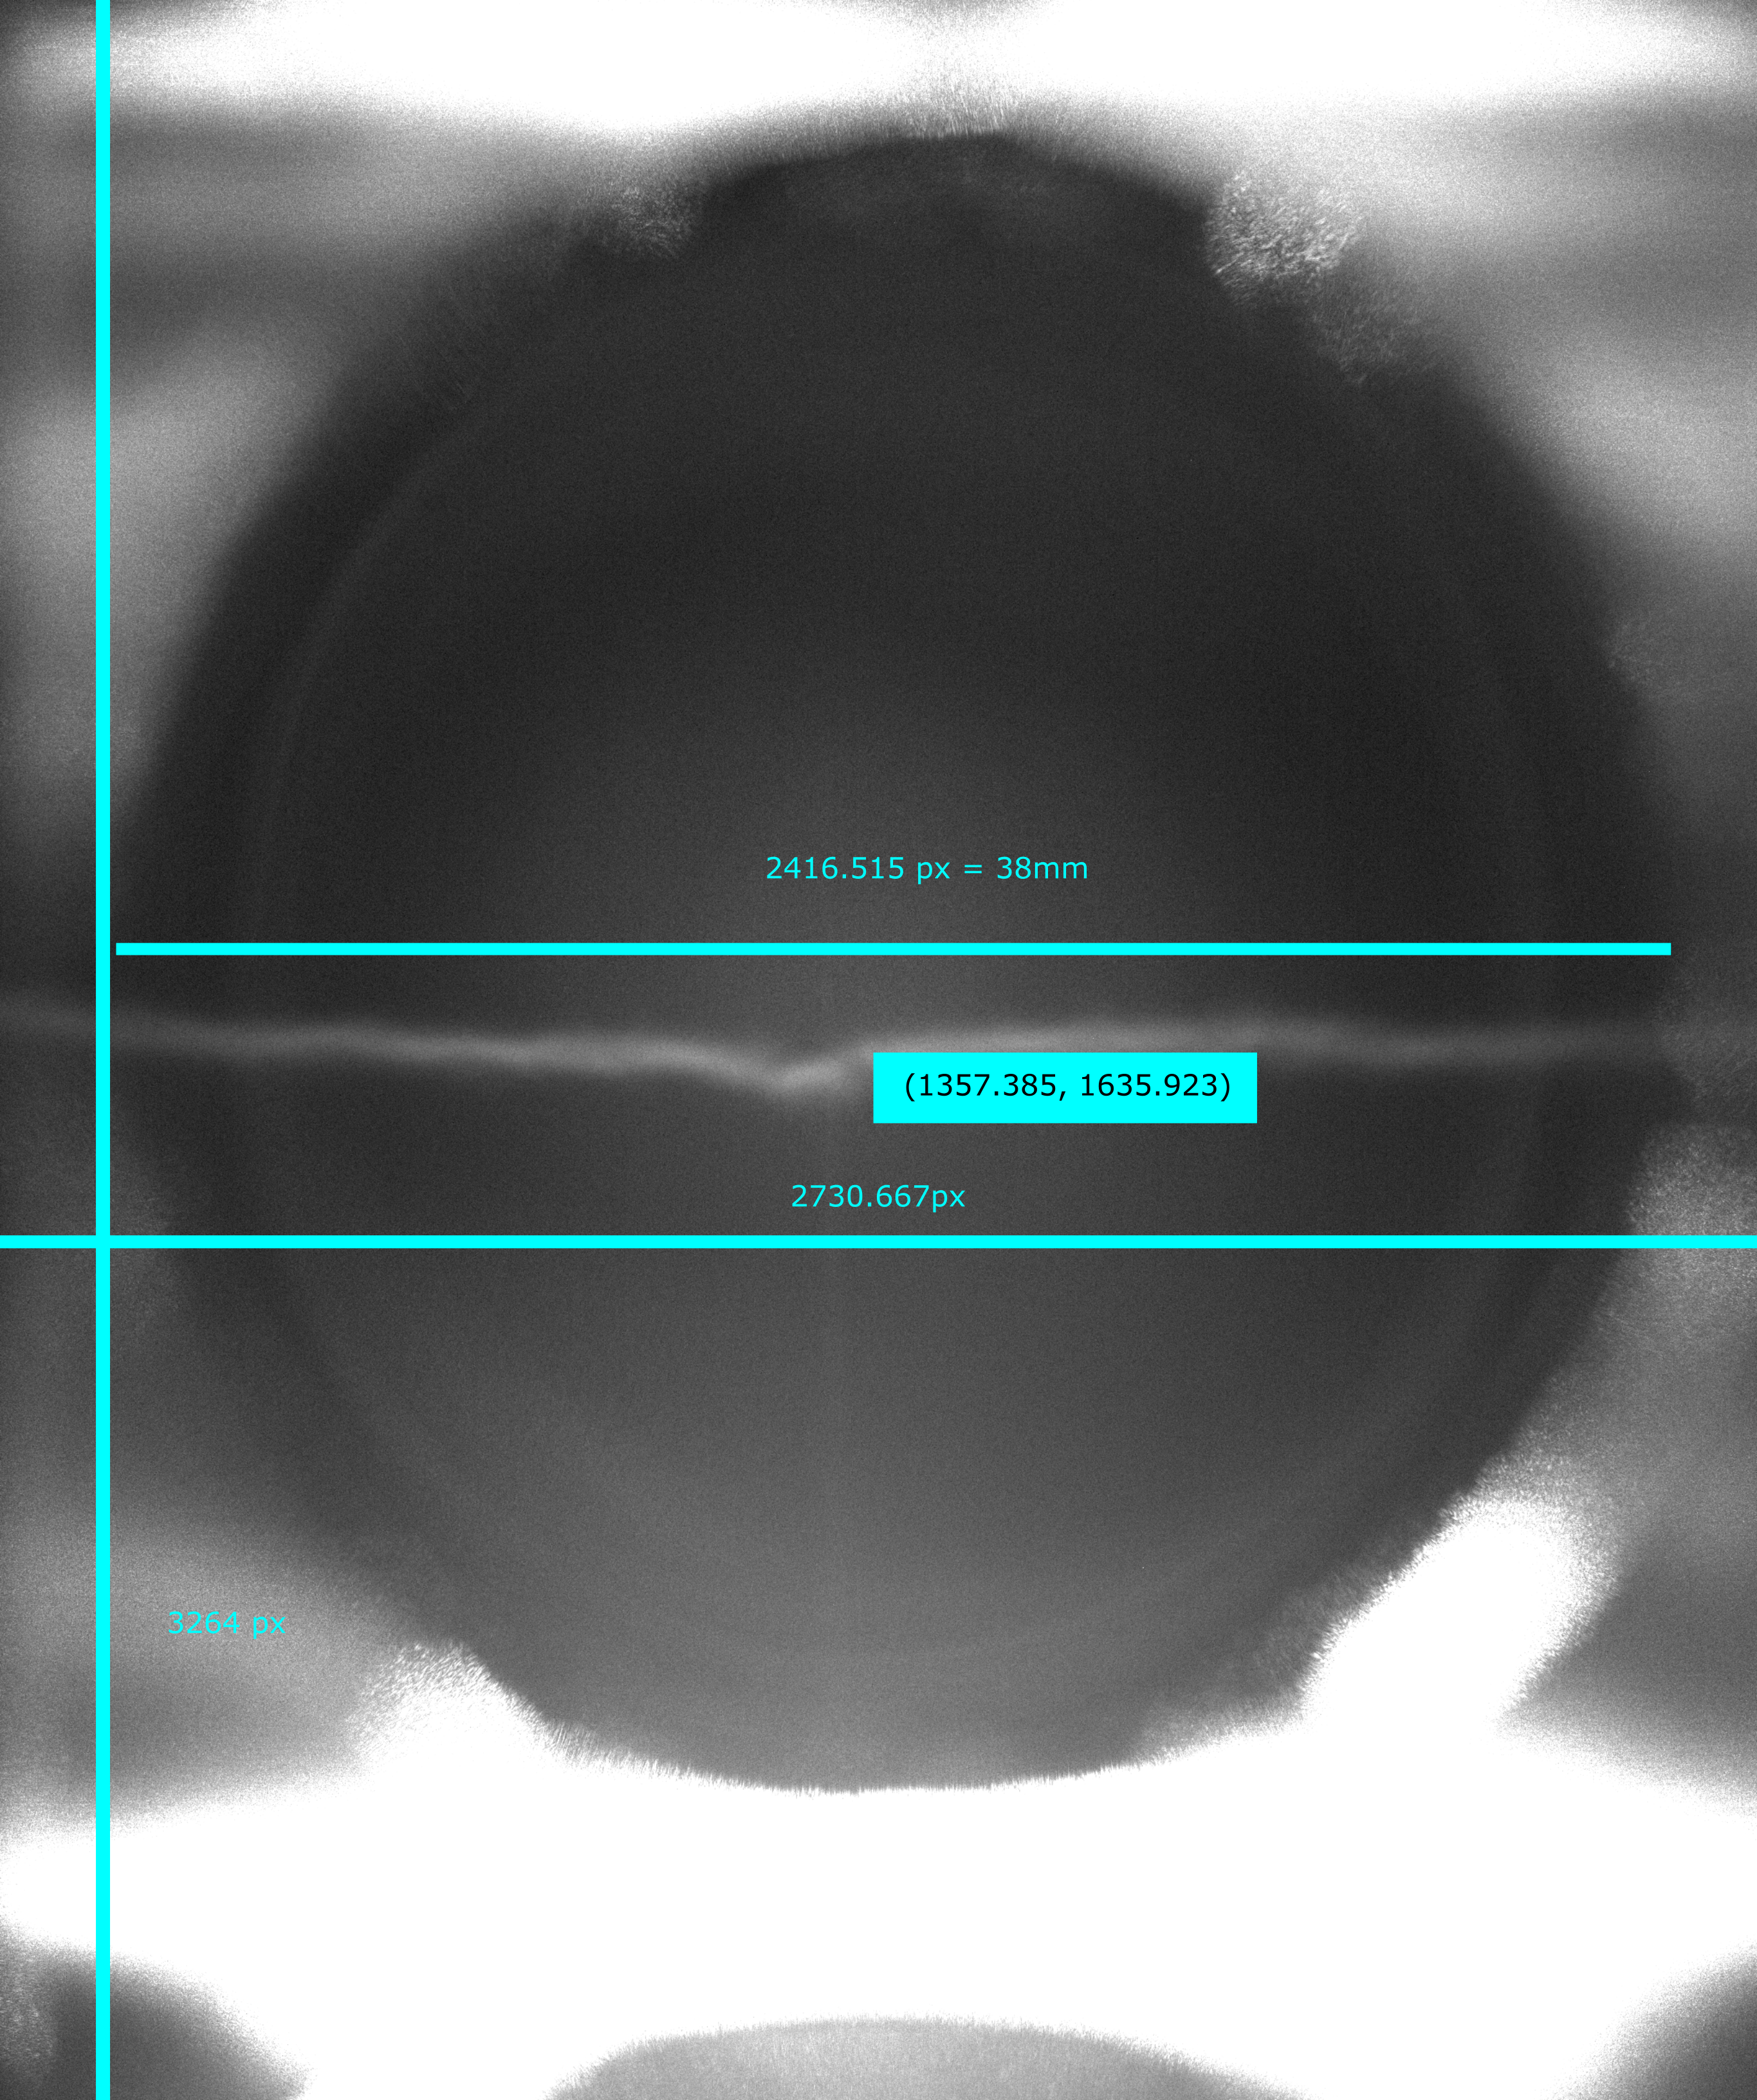

In [3]:
width_of_38mm_in_inkscape_at_aperture = 2416.515
width_of_38mm_in_inkscape_at_mot = width_of_38mm_in_inkscape_at_aperture * (54+150)/150

width_of_picture_in_inkspace = 2730.667
width_of_picture_in_camera_pixels = mot_pic.shape[1]

mm_per_inkskape_pixel = 38 / width_of_38mm_in_inkscape_at_mot
inkspake_pixels_per_camera_pixel = width_of_picture_in_inkspace / width_of_picture_in_camera_pixels
width_of_image_in_mm = width_of_picture_in_camera_pixels * inkspake_pixels_per_camera_pixel * mm_per_inkskape_pixel

width_of_image_in_mm

31.573587802853186

In [4]:
height_of_picture_in_camera_pixels = mot_pic.shape[0]
height_of_image_in_mm = height_of_picture_in_camera_pixels * inkspake_pixels_per_camera_pixel * mm_per_inkskape_pixel
height_of_picture_in_inkspace = 3264

height_of_image_in_mm

37.740304170597945

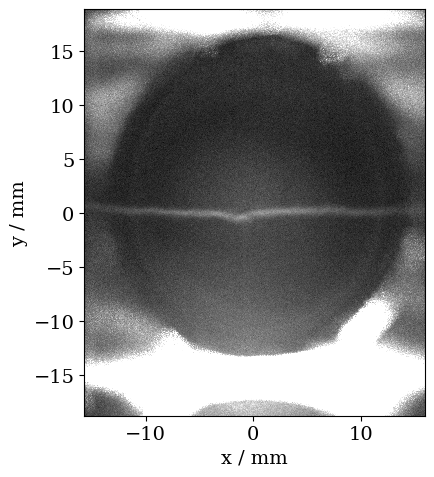

In [5]:
position_of_mot_x_mm = 1357.4 * mm_per_inkskape_pixel
position_of_mot_y_mm = (height_of_picture_in_inkspace - 1635.9) * mm_per_inkskape_pixel

fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(mot_pic,
           extent=(
               -position_of_mot_x_mm, width_of_image_in_mm - position_of_mot_x_mm,
               -position_of_mot_y_mm, height_of_image_in_mm-position_of_mot_y_mm
           ),
           cmap='gray', vmin=0, vmax=255,
           interpolation="none",
          )

plt.xlabel("x / mm")
plt.ylabel("y / mm")

plt.tight_layout()

plt.savefig("2dmot.png")
plt.savefig("2dmot.pdf")